In [1]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'
%load_ext sql
#!pip install pandas

In [2]:
import sqlite3

con = sqlite3.connect("chicago.db")

In [3]:
import pandas as pd

In [4]:
#llenamos la base de datos
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False)

In [12]:
df.columns

Index(['ca', 'community_area_name', 'percent_of_housing_crowded',
       'percent_households_below_poverty', 'percent_aged_16_unemployed',
       'percent_aged_25_without_high_school_diploma',
       'percent_aged_under_18_or_over_64', 'per_capita_income_',
       'hardship_index'],
      dtype='object')

In [13]:
%sql sqlite:///chicago.db

In [14]:
%%sql

SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///chicago.db
Done.


COUNT(*)
78


In [20]:
df['ca'].describe

<bound method NDFrame.describe of 0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
73    74.0
74    75.0
75    76.0
76    77.0
77     NaN
Name: ca, Length: 78, dtype: float64>

In [21]:
%%sql

SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50

 * sqlite:///chicago.db
Done.


COUNT(*)
38


In [29]:
maximo = %sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;
print(maximo)
print(maximo*2)

 * sqlite:///chicago.db
Done.
+---------------------+
| MAX(hardship_index) |
+---------------------+
|         98.0        |
+---------------------+
[(98.0,), (98.0,)]


In [30]:
help(maximo)

Help on ResultSet in module sql.run object:

class ResultSet(builtins.list, sql.column_guesser.ColumnGuesserMixin)
 |  ResultSet(sqlaproxy, config)
 |
 |  Results of a SQL query.
 |
 |  Can access rows listwise, or by string value of leftmost column.
 |
 |  Method resolution order:
 |      ResultSet
 |      builtins.list
 |      sql.column_guesser.ColumnGuesserMixin
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  DataFrame(self)
 |      Returns a Pandas DataFrame instance built from the result set.
 |
 |  __getitem__(self, key)
 |      Access by integer (row position within result set)
 |      or by string (value of leftmost column)
 |
 |  __init__(self, sqlaproxy, config)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __str__(self, *arg, **kwarg)
 |      Return str(self).
 |
 |  bar(self, key_word_sep=' ', title=None, **kwargs)
 |      Generates a pylab bar plot from the result set.
 |
 |      ``matplotlib`` must be installed, and in an
 |   

In [36]:
res = %sql SELECT * FROM chicago_socioeconomic_data GROUP BY ca ORDER BY hardship_index DESC LIMIT 1;
print(res)

 * sqlite:///chicago.db
Done.
+------+---------------------+----------------------------+----------------------------------+----------------------------+---------------------------------------------+----------------------------------+--------------------+----------------+
|  ca  | community_area_name | percent_of_housing_crowded | percent_households_below_poverty | percent_aged_16_unemployed | percent_aged_25_without_high_school_diploma | percent_aged_under_18_or_over_64 | per_capita_income_ | hardship_index |
+------+---------------------+----------------------------+----------------------------------+----------------------------+---------------------------------------------+----------------------------------+--------------------+----------------+
| 54.0 |      Riverdale      |            5.8             |               56.5               |            34.6            |                     27.5                    |               51.5               |        8201        |      98.0      

In [37]:
cant_registros = %sql SELECT COUNT(*) FROM chicago_socioeconomic_data;
cant_ca = %sql SELECT COUNT(DISTINCT(ca)) FROM chicago_socioeconomic_data;


 * sqlite:///chicago.db
Done.
 * sqlite:///chicago.db
Done.


In [38]:
print(cant_registros, cant_ca)

+----------+
| COUNT(*) |
+----------+
|    78    |
+----------+ +---------------------+
| COUNT(DISTINCT(ca)) |
+---------------------+
|          77         |
+---------------------+


Esto demuestra que no hay repetidos, son todos ca distintas. Eso simplifica el codigo, no necesito agrupar los registros por ca

In [43]:
res = %sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 1;
print(res)

 * sqlite:///chicago.db
Done.
+---------------------+
| community_area_name |
+---------------------+
|      Riverdale      |
+---------------------+


In [66]:
mxm = str(maximo.pop()[0])
print(mxm)

IndexError: pop from empty list

In [71]:
#otra forma es usar el resultado del maximo hardship index ontenido en el ejercicio 2
maximo = %sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;
#o lo que es lo mismo
maximo1 = %sql SELECT hardship_index FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 1;
#maximo es un result set, es un iterador.
#hago pop para quedarme con el primer resultado, el unico. 
mxm = str(maximo.pop()[0])
print(mxm)
res = %sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = :mxm;
print(res)

 * sqlite:///chicago.db
Done.
 * sqlite:///chicago.db
Done.
98.0
 * sqlite:///chicago.db
Done.
+---------------------+
| community_area_name |
+---------------------+
|      Riverdale      |
+---------------------+


Which Chicago community areas have per-capita incomes greater than $60,000??

In [72]:
%sql PRAGMA table_info(my_table);

 * sqlite:///chicago.db
Done.


cid,name,type,notnull,dflt_value,pk


In [73]:
columns = %sql SELECT name FROM pragma_table_info('my_table');
column_names = [row[0] for row in columns]
print(column_names)

 * sqlite:///chicago.db
Done.
[]


In [74]:
df.columns

Index(['ca', 'community_area_name', 'percent_of_housing_crowded',
       'percent_households_below_poverty', 'percent_aged_16_unemployed',
       'percent_aged_25_without_high_school_diploma',
       'percent_aged_under_18_or_over_64', 'per_capita_income_',
       'hardship_index'],
      dtype='object')

In [76]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * sqlite:///chicago.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

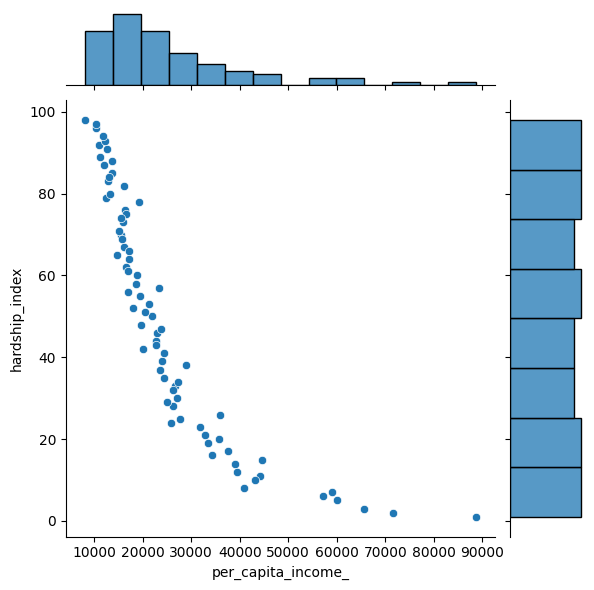

In [78]:
plot = sns.jointplot(x="per_capita_income_", y="hardship_index", data=df)
plt.show()

Hay una correlacion negativa, quiere decir que mientras menos dinero, mas hardship index, y mientras mas hardship index, menos dinero. Es una relacion inversamente proporcional